<a href="https://colab.research.google.com/github/Tuan19146029/Tuan19146029/blob/main/BTVN_CNN_fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.python.keras.utils.data_utils import Sequence
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
train_path = '/content/drive/MyDrive/fruit'
valid_path = '/content/drive/MyDrive/fruit'
test_path = '/content/drive/MyDrive/fruit'

In [ ]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_batches = train_datagen.flow_from_directory(train_path, target_size=(224, 224),
                                                  batch_size=10, class_mode='categorical')

validation_batches = test_datagen.flow_from_directory(valid_path, target_size=(224, 224),
                                                      batch_size=10, class_mode='categorical')

test_batches = test_datagen.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 200 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


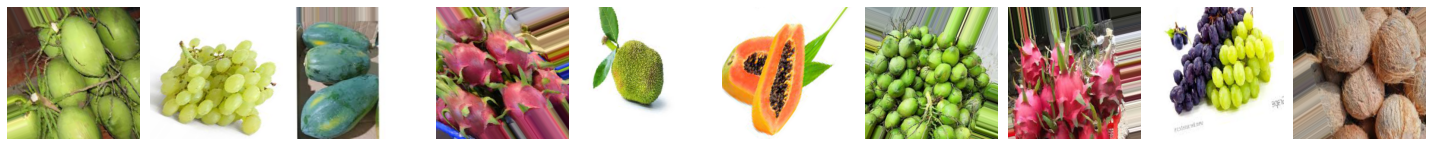

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [ ]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Flatten(),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 256)     147712    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=validation_batches,
          validation_steps=len(validation_batches), epochs=200, verbose=1)

Epoch 1/200
20/20 [==============================] - 4s 197ms/step - loss: 0.1623 - accuracy: 0.9350 - val_loss: 0.0331 - val_accuracy: 0.9900
Epoch 2/200
20/20 [==============================] - 7s 349ms/step - loss: 0.1939 - accuracy: 0.9400 - val_loss: 0.0146 - val_accuracy: 0.9950
Epoch 3/200
20/20 [==============================] - 4s 216ms/step - loss: 0.1597 - accuracy: 0.9450 - val_loss: 0.0319 - val_accuracy: 0.9900
Epoch 4/200
20/20 [==============================] - 4s 179ms/step - loss: 0.0809 - accuracy: 0.9800 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 5/200
20/20 [==============================] - 4s 175ms/step - loss: 0.1452 - accuracy: 0.9700 - val_loss: 0.4689 - val_accuracy: 0.9250
Epoch 6/200
20/20 [==============================] - 4s 175ms/step - loss: 0.2694 - accuracy: 0.9150 - val_loss: 0.1052 - val_accuracy: 0.9500
Epoch 7/200
20/20 [==============================] - 3s 172ms/step - loss: 0.1215 - accuracy: 0.9600 - val_loss: 0.0186 - val_accuracy: 0.9900

In [8]:
model.save('TrainFood.h5')

In [12]:
classes = ['avocado','coconut','dragon_fruit','grape','guava','jackfruit','lychee','mango','mangosteen','papaya']


Saving lychee2.jpg to lychee2.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
dự đoán:  lychee


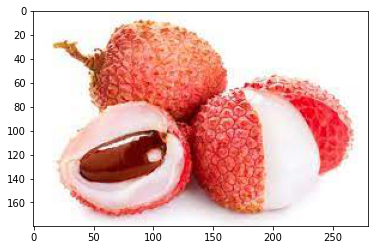

In [18]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=200000)
  print(y_predict)
  print('dự đoán: ', classes[np.argmax(y_predict)])